# Deep Learning

1. ANN- Artificial Neural Network
2. CNN- Convolutional Neural Network
3. RNN- Recurrent Neural Network


1.Here ANN is foundation, where we learn neural network, back propagation, loss function,
 activation function, optimizer. Most of the case we use it for Tabular data.

2. When we have grid data that means, image and video data then we use CNN.

3. When we time series data, that means un-structured data, that means text, audio we use RNN.

#### What is CNN?
-> Convolutional Neural Network also known as convnet (CNN) are the special special kinds of neural network for processing data that has known grid like topology.

#### here one row or one column is Grid
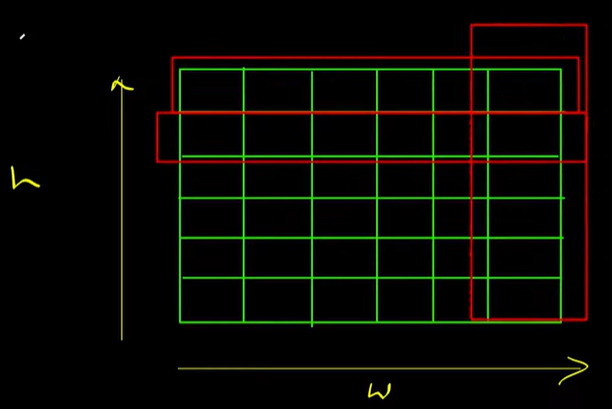

### Neural Network (CNN)
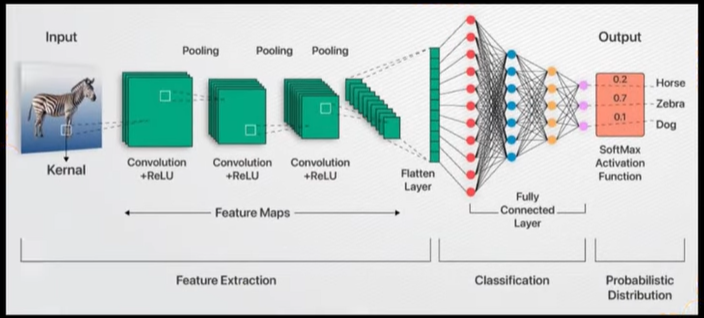

### ANN / FC / Dense layer <----------------> and normally we can say it CNN
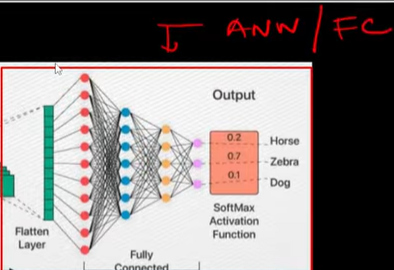   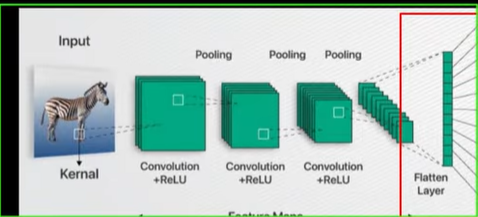

### How we understand that this is CNN layer?
-> There must be 3 layer
1. Convolution layer 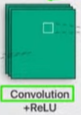
2. Pooling layer 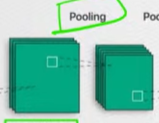
3. Fully Connected (FC) layer 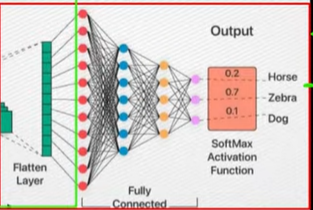


ReLU -> Activation function

1. ANN is used for -> matrix multiplication
2. CNN is used for -> convolution(it is also matrix multiplication)

in 1998, Yaan Leacan publish AT and T lab, which is Lenet-5 for document
-> which can recognize 1. digit, 2. alplabet

### Why don't use ANN?
1. High computation cost
2. overfitting issue
3. loss of important spacial features/pixers

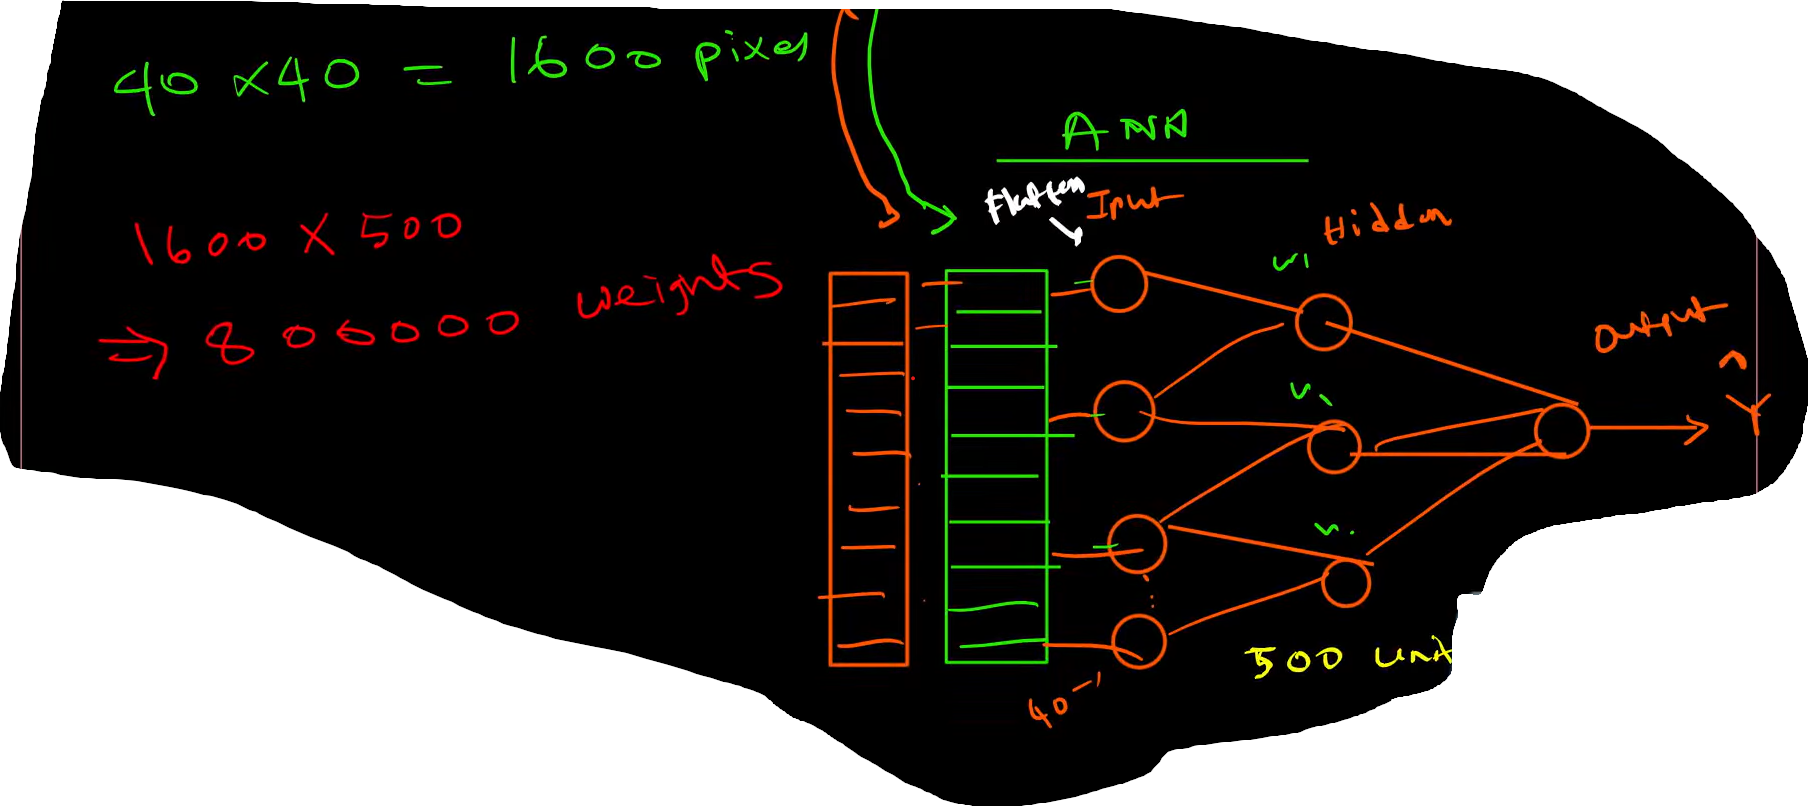

# CNN

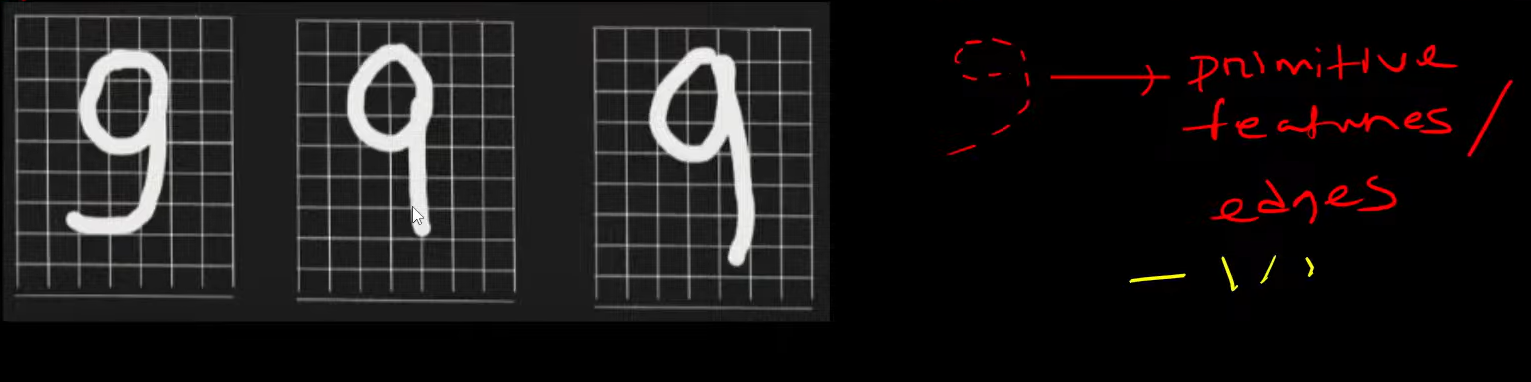

## conv layer  
- feature extraction  

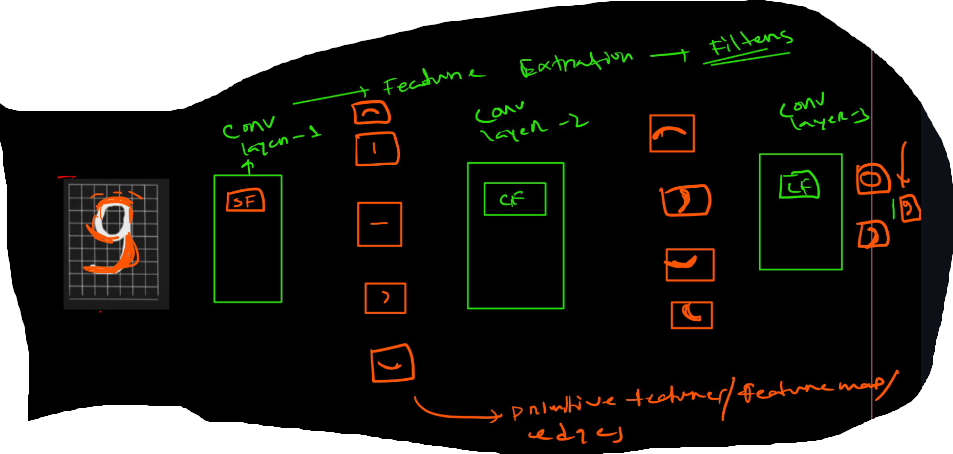

- filters (like human brain cell)

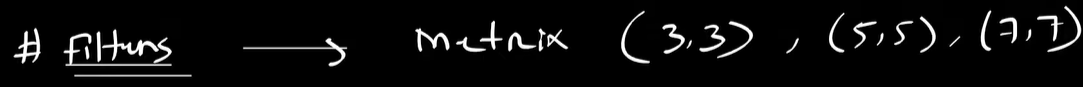

1. SOBEL X (Vertical edge detection)
   Why used: Detect vertical edges by capturing left–right intensity changes.
   Matrix:
       [-1,  0,  1]
       [-2,  0,  2]
       [-1,  0,  1]

2. SOBEL Y (Horizontal edge detection)
   Why used: Detect horizontal edges by capturing top–bottom intensity changes.
   Matrix:
       [-1, -2, -1]
       [ 0,  0,  0]
       [ 1,  2,  1]

3. SOBEL NORTH (N)
   Why used: Highlights edges in the upward direction.
   Matrix:
       [ 1,  2,  1]
       [ 0,  0,  0]
       [-1, -2, -1]

4. SOBEL SOUTH (S)
   Why used: Detects edges in the downward direction.
   Matrix:
       [-1, -2, -1]
       [ 0,  0,  0]
       [ 1,  2,  1]

5. SOBEL EAST (E)
   Why used: Detects right-side vertical edges.
   Matrix:
       [-1,  0,  1]
       [-2,  0,  2]
       [-1,  0,  1]

6. SOBEL WEST (W)
   Why used: Detects left-side vertical edges.
   Matrix:
       [ 1,  0, -1]
       [ 2,  0, -2]
       [ 1,  0, -1]

7. SOBEL NORTH-EAST (NE)
   Why used: Detects diagonal edges directed toward the top-right.
   Matrix:
       [ 0,  1,  2]
       [-1,  0,  1]
       [-2, -1,  0]

8. SOBEL SOUTH-EAST (SE)
   Why used: Detects diagonal edges directed toward the bottom-right.
   Matrix:
       [-2, -1,  0]
       [-1,  0,  1]
       [ 0,  1,  2]

9. SOBEL SOUTH-WEST (SW)
   Why used: Detects diagonal edges directed toward the bottom-left.
   Matrix:
       [ 0, -1, -2]
       [ 1,  0, -1]
       [ 2,  1,  0]

10. SOBEL NORTH-WEST (NW)
    Why used: Detects diagonal edges directed toward the top-left.
    Matrix:
        [ 2,  1,  0]
        [ 1,  0, -1]
        [ 0, -1, -2]


CANNY EDGE DETECTION — FULL PROCESS (ALL STEPS TOGETHER)

Step 1: Gaussian Blur (Noise Reduction)
Why: Smooths image and removes noise so false edges don’t appear.
Gaussian Kernel (5×5 example):
    [ 2,  4,  5,  4, 2]
    [ 4,  9, 12,  9, 4]
    [ 5, 12, 15, 12, 5]
    [ 4,  9, 12,  9, 4]
    [ 2,  4,  5,  4, 2]

Step 2: Gradient Calculation using Sobel filters
Why: Computes edge strength and edge direction.
Sobel X (Gx):
    [-1,  0,  1]
    [-2,  0,  2]
    [-1,  0,  1]
Sobel Y (Gy):
    [-1, -2, -1]
     [ 0,  0,  0]
     [ 1,  2,  1]

Step 3: Gradient Magnitude
Why: Measures how strong the edge is.
Formula:
    Magnitude = sqrt(Gx² + Gy²)

Step 4: Gradient Direction
Why: Determines the orientation of the edge.
Formula:
    Direction = arctan(Gy / Gx)

Step 5: Non-Maximum Suppression (NMS)
Why: Thins edges — keeps only the pixel that is the strongest in its direction.
Explanation:
    • Compare gradient pixel with neighbors along the gradient direction
    • Keep only if it is maximum
    • Everything else suppressed

Step 6: Double Thresholding
Why: Categorizes edges into strong, weak, and non-edge.
Threshold rules:
    • Strong edge → Intensity > High threshold
    • Weak edge   → Between high & low thresholds
    • Non-edge    → Below low threshold

Step 7: Edge Tracking by Hysteresis
Why: Connects weak edges to strong edges and removes isolated ones.
Rules:
    • Keep strong edges
    • Keep weak edges ONLY if connected to strong edges
    • Remove noise edges


## but CNN we use neural network based filter
- in cnn we need to change our filter matrix based on our data, 
- - we will change it using back-propagation 

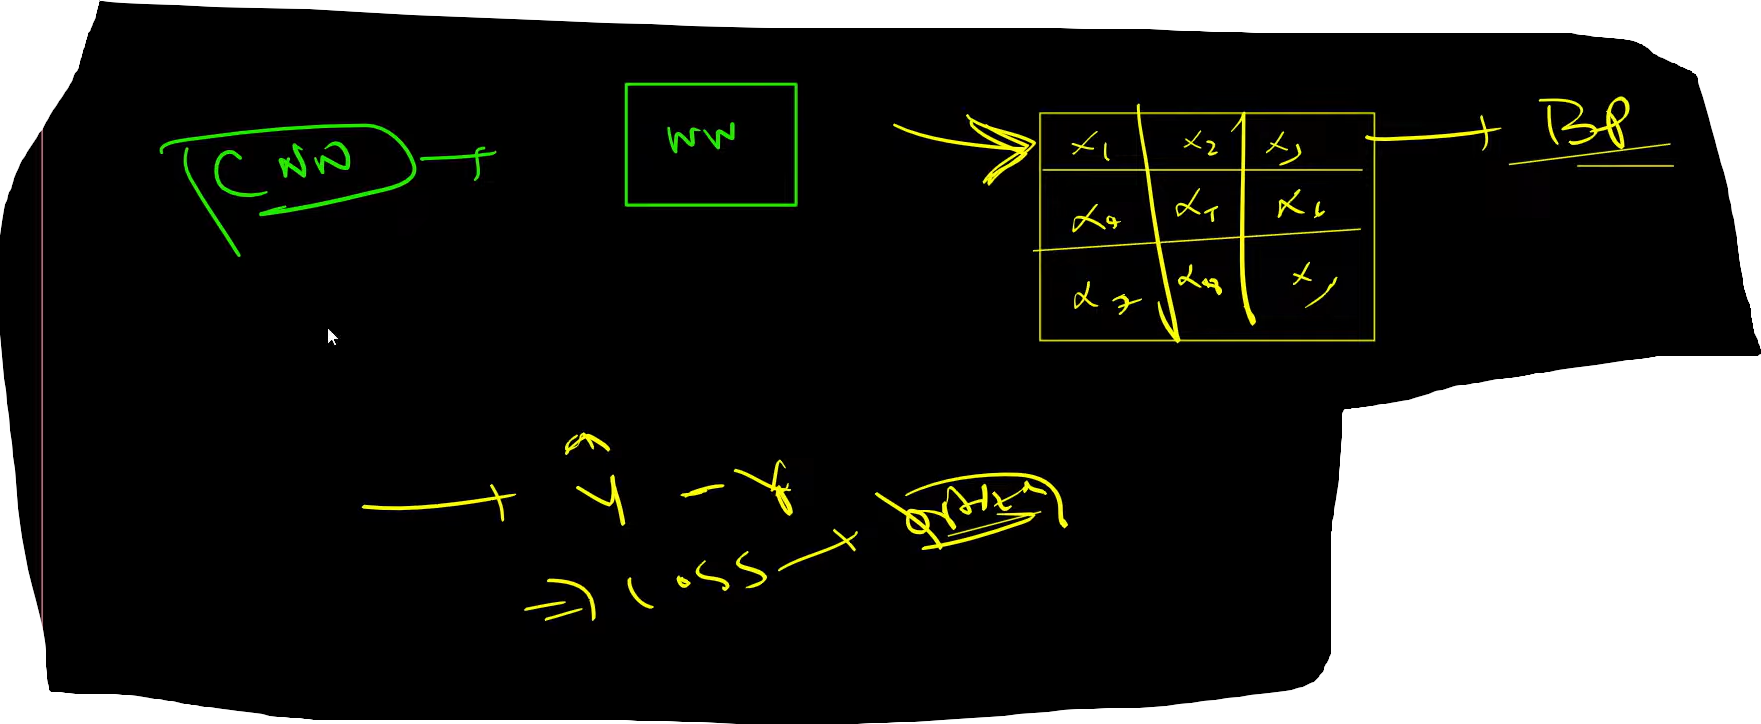

### 1. Simple Convolution Visualization

![Simple Convolution](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\simple convolution.gif)

---

### 2. Matrix Calculation Visualization

![Matrix Calculation](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\matrix calculation.gif)

---

### 3. Padding Concept Visualization

![Padding Concept](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\padding concept.gif)

---

### 4. Stride Concept Visualization

![Stride Concept](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\stride concept.gif)

---

### 5. Feature Accumulation Visualization

![Feature Accumulation](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\feature accumulation.gif)

---

### 6. Feature Aggregation Visualization

![Feature Aggregation](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\feature aggregation.gif)

---

### 7. Convolution Operation Visualization

![Convolution Operation](C:\Inception BD\Computer Vision\Computer_Vision\day3\resources\convolution operation.gif)

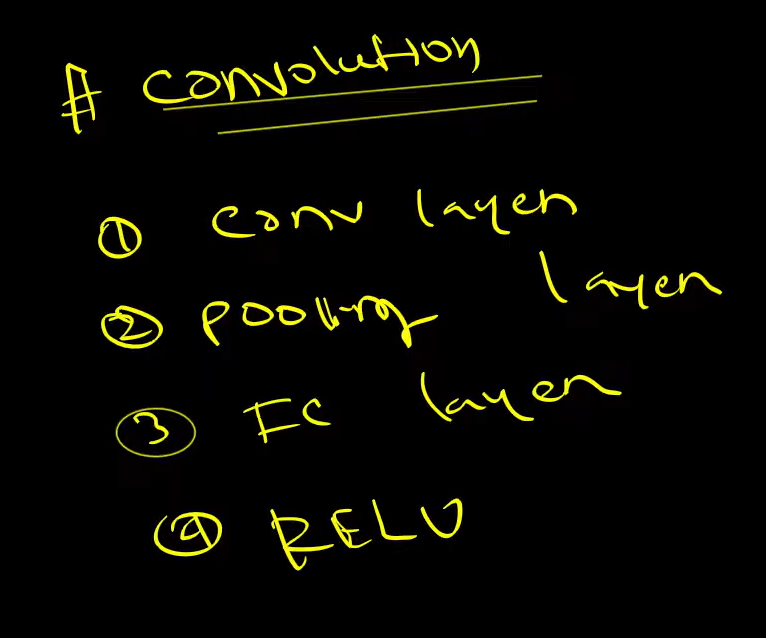

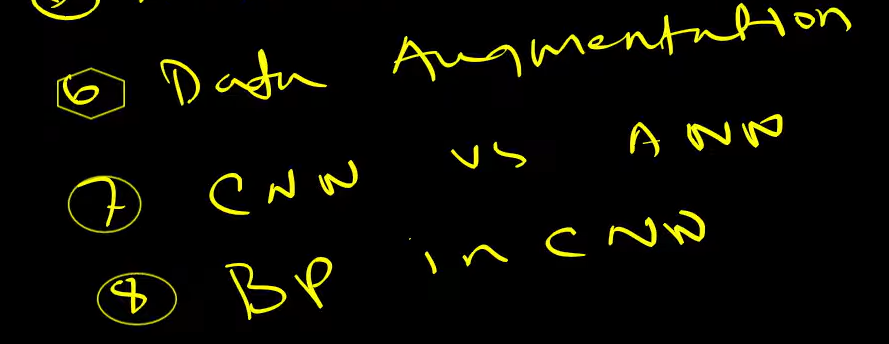

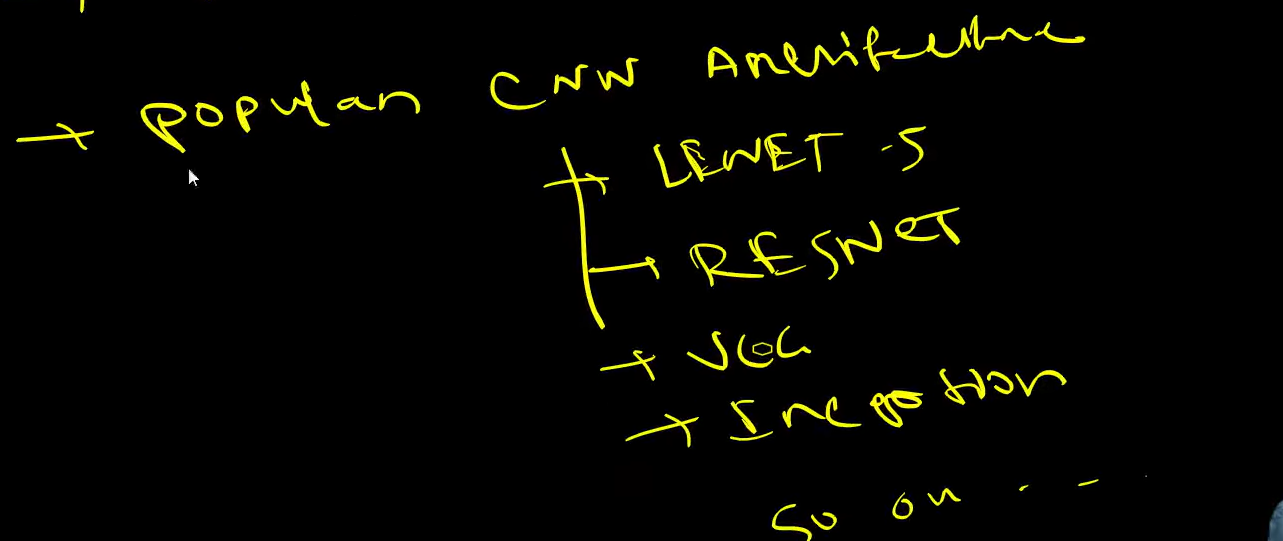

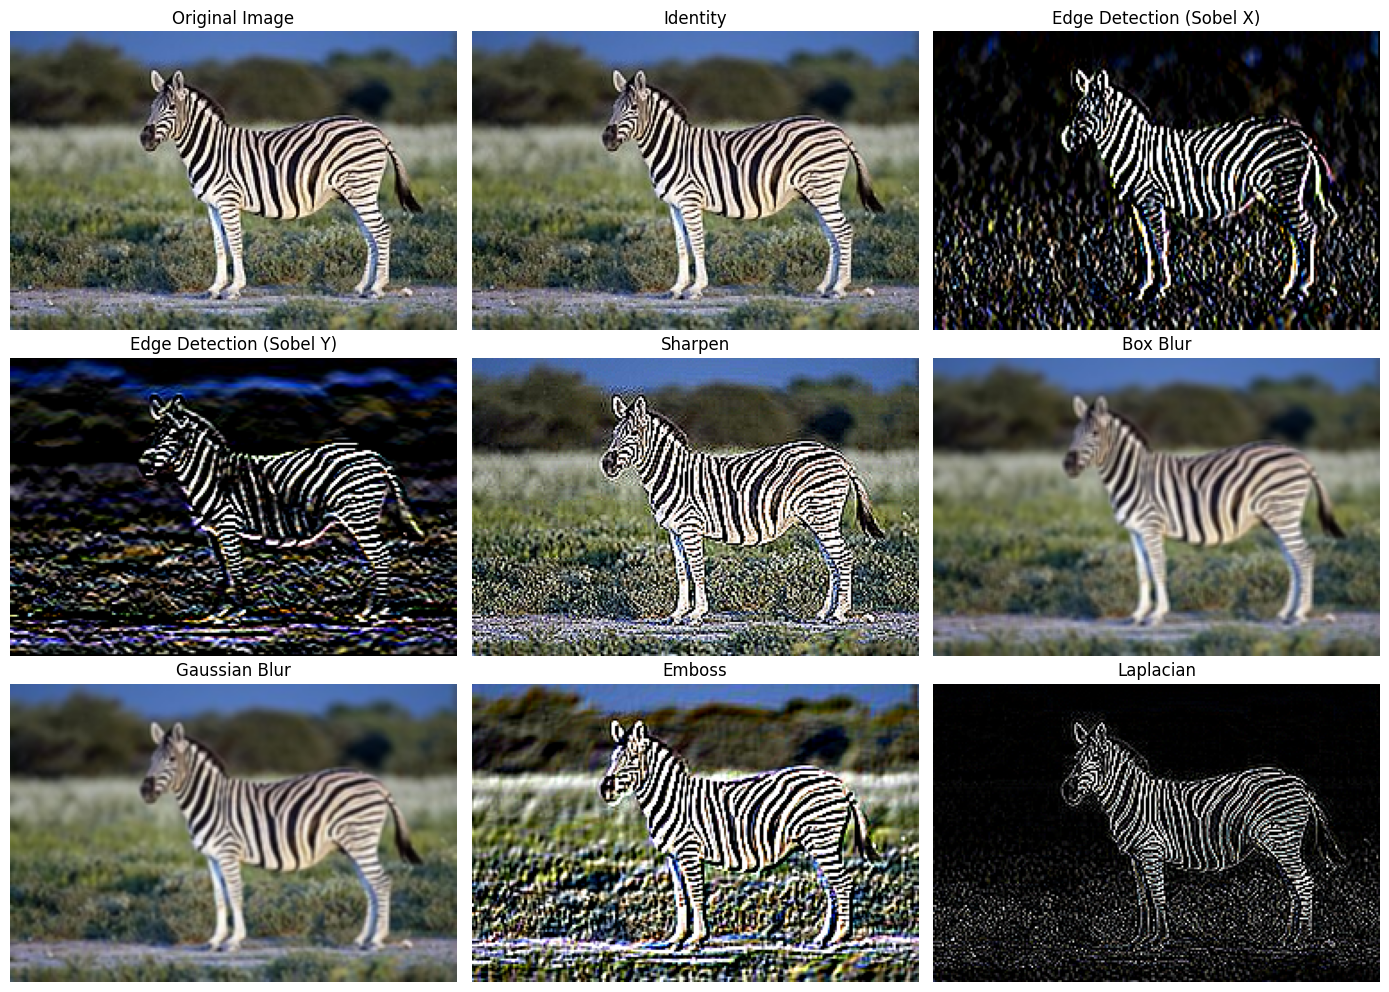

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- Step 1: Image Load ----------
img = cv2.imread('C:\\Inception BD\\Computer Vision\\Computer_Vision\\day3\\resources\\zebra.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---------- Step 2: Define Kernels ----------
kernels = {
    "Identity": np.array([[0,0,0],[0,1,0],[0,0,0]]),
    "Edge Detection (Sobel X)": np.array([[1,0,-1],[2,0,-2],[1,0,-1]]),
    "Edge Detection (Sobel Y)": np.array([[1,2,1],[0,0,0],[-1,-2,-1]]),
    "Sharpen": np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
    "Box Blur": np.ones((3,3), np.float32)/9,
    "Gaussian Blur": np.array([[1,2,1],[2,4,2],[1,2,1]], np.float32)/16,
    "Emboss": np.array([[-2,-1,0],[-1,1,1],[0,1,2]]),
    "Laplacian": np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]),
}

# ---------- Step 3: Apply all Kernels ----------
filtered_images = {}
for name, kernel in kernels.items():
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_images[name] = filtered

# ---------- Step 4: Visualization ----------
plt.figure(figsize=(14,10))
plt.subplot(3,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

i = 2
for name, fimg in filtered_images.items():
    plt.subplot(3,3,i)
    plt.imshow(fimg)
    plt.title(name)
    plt.axis('off')
    i += 1

plt.tight_layout()
plt.show()
